In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/kaggle/input/electronics/electronics.csv')
df

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0


In [3]:
df.shape

(1292954, 10)

In [4]:
df.drop(['split'],inplace=True,axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 88.8+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand          961834
year                0
user_attr     1118830
dtype: int64

In [8]:
df['brand']=df['brand'].fillna(df['brand'].mode()[0])
df['user_attr']=df['user_attr'].fillna(df['user_attr'].mode()[0])

In [9]:
df.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
dtype: int64

In [10]:
df.shape

(1292954, 9)

In [11]:
df.dropna()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,Bose,1999,Male
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,Bose,1999,Male
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,Bose,1999,Male
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,Bose,1999,Male
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,Bose,1999,Male
...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,Male
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,Bose,2017,Male
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,Bose,2016,Male
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,Bose,2018,Male


In [12]:
df.describe()

,item_id,user_id,rating,year
count,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.183588e+03,5.605127e+05,4.051482e+00,2.012938e+03
std,2.525346e+03,3.342374e+05,1.379732e+00,2.643513e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,1.999000e+03
25%,2.018000e+03,2.697482e+05,4.000000e+00,2.012000e+03
50%,3.930000e+03,5.518920e+05,5.000000e+00,2.014000e+03
75%,6.289000e+03,8.474858e+05,5.000000e+00,2.015000e+03
max,9.559000e+03,1.157632e+06,5.000000e+00,2.018000e+03


In [13]:
df['month']=pd.DatetimeIndex(df['timestamp']).month
df

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,month
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,Bose,1999,Male,6
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,Bose,1999,Male,6
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,Bose,1999,Male,6
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,Bose,1999,Male,7
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,Bose,1999,Male,7
...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,Male,9
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,Bose,2017,Male,9
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,Bose,2016,Male,9
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,Bose,2018,Male,9


# **Distribution of Ratings**

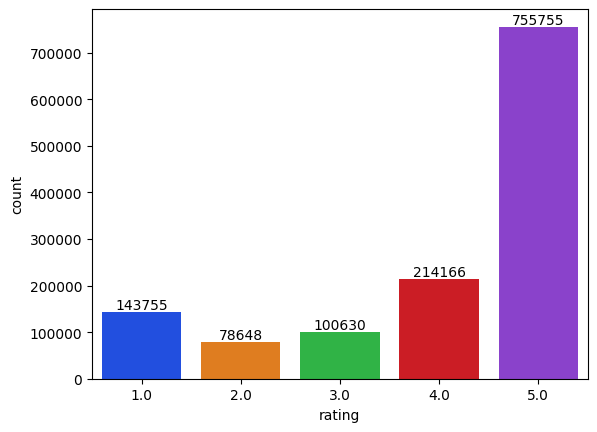

In [14]:
x=sns.countplot(x='rating', data=df,palette='bright')
for count in x.containers:
  x.bar_label(count)

# **Best Year Of Sales**

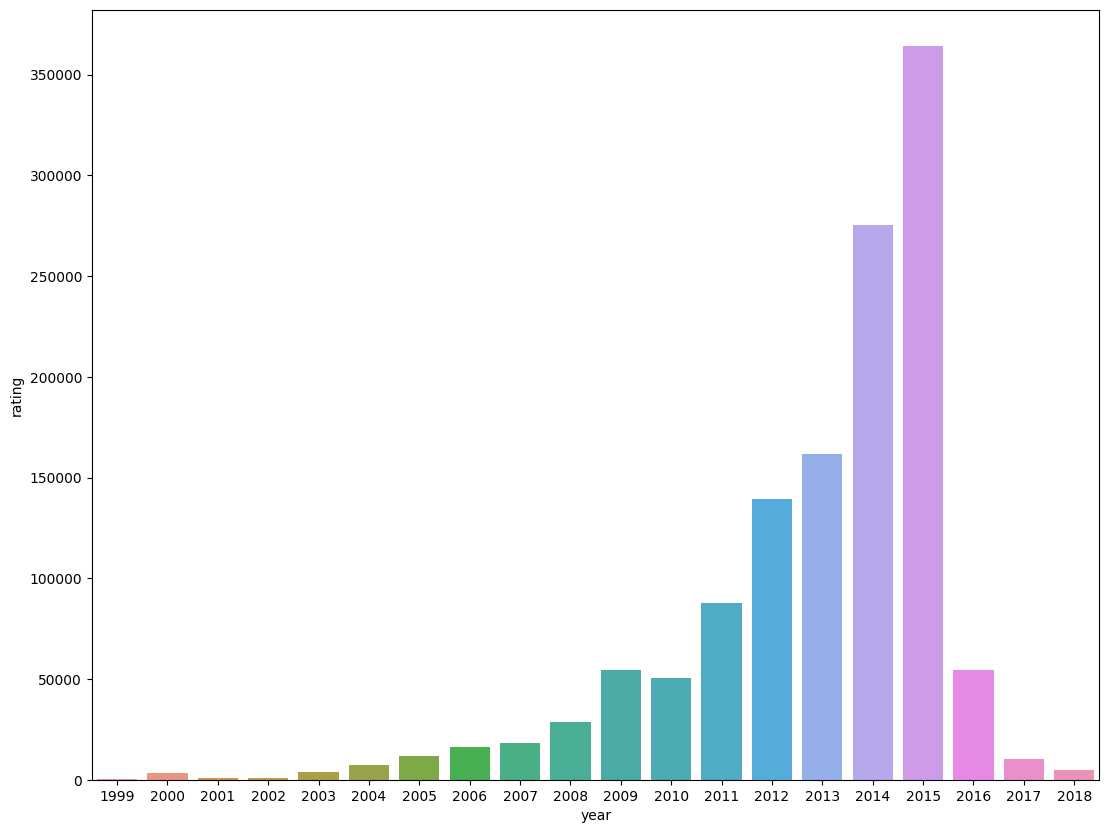

In [15]:
plt.figure(figsize=(13,10))
bst_sale=df.groupby(['year'],as_index=False)['rating'].count().sort_values(by='rating',ascending=False)
sns.barplot(x='year',y='rating',data=bst_sale)
plt.show()



# **The Brand sold the most in Year 2015**

<Axes: ylabel='brand'>

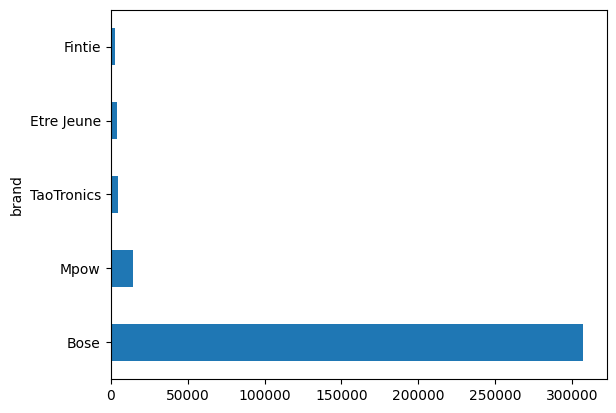

In [16]:
df_2014 = df[df['year'] == 2015]

df_2014.groupby('brand')['rating'].count().sort_values(ascending=False).head(5).plot(kind='barh')

# **Most Sold category of the Product**

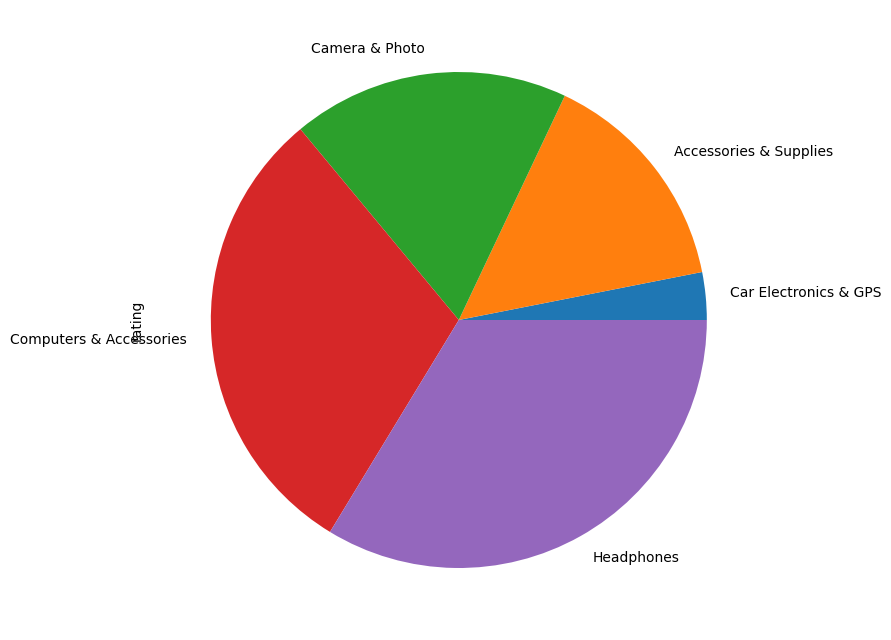

In [17]:
plt.figure(figsize=(8,14))
df.groupby('category')['rating'].count().head(5).sort_values().plot(kind='pie');

# ****Average Ratings Trend Over the Years****

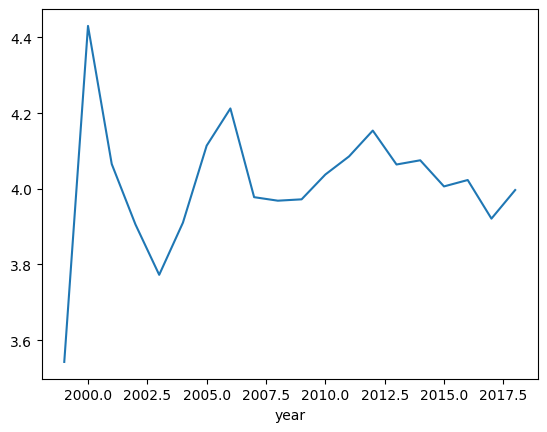

In [18]:
avg_rating2=df.groupby('year')['rating'].mean().plot(kind="line")
plt.show()

# Month which product sold most

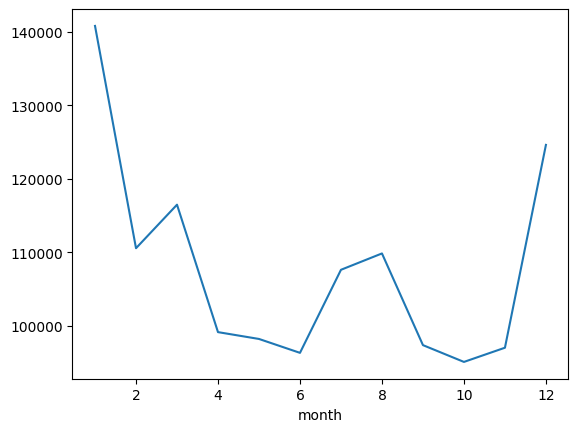

In [19]:
df.groupby('month')['rating'].count().plot(kind='line');